In [304]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

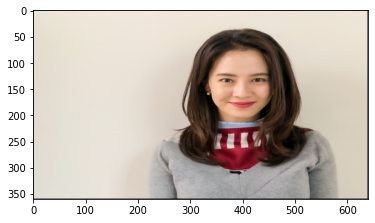

In [484]:
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/songjihyo2.png'

# img_bgr에 불러온 이미지 넣기. 이미지 색상 방식이 RGB가 아닌 BGR로 되어있으므로 바꿔줘야 함.
img_bgr = cv2.imread(my_image_path)

# 이미지 사이즈 조정
img_bgr = cv2.resize(img_bgr, (640, 360))

# 이미지 색상 조정하기(BGR -> RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 출력용 이미지를 별도 변수에 저장
img_show = img_rgb.copy()

plt.imshow(img_rgb)
plt.show()

In [485]:
import dlib

# detector 객체 선언
detector_hog = dlib.get_frontal_face_detector()

# 다양한 크기의 원본 이미지를 통해.... 뭔 소린지 모르겠다...
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

rectangles[[(339, 96) (468, 225)]]


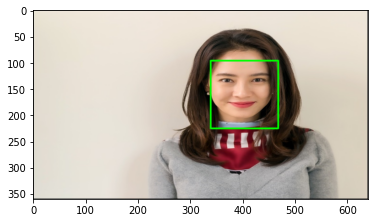

In [486]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

plt.imshow(img_rgb)
plt.show()

In [487]:
# landmark모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [488]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(list_landmarks)

[[(339, 130), (339, 145), (341, 160), (344, 173), (352, 186), (361, 197), (371, 206), (383, 213), (398, 214), (412, 211), (423, 202), (434, 192), (443, 183), (449, 172), (453, 160), (454, 149), (453, 137), (346, 125), (356, 120), (368, 120), (379, 121), (391, 124), (412, 125), (422, 122), (433, 120), (443, 120), (450, 126), (401, 134), (401, 143), (401, 152), (401, 162), (386, 166), (393, 168), (400, 170), (407, 168), (414, 166), (360, 133), (367, 132), (375, 132), (383, 137), (375, 137), (366, 136), (418, 136), (425, 132), (433, 131), (440, 134), (433, 136), (425, 136), (372, 176), (383, 176), (393, 175), (400, 177), (406, 175), (414, 175), (424, 175), (414, 183), (406, 187), (400, 188), (393, 188), (383, 184), (376, 177), (393, 180), (400, 181), (406, 180), (420, 177), (406, 180), (400, 181), (393, 181)]]


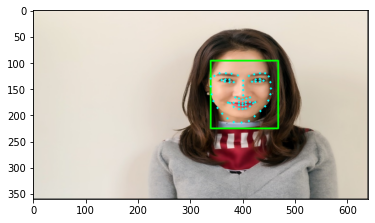

In [489]:

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb, point, 2, (0, 255, 255), -1) # 노란색 원으로 랜드마크 표시
        
plt.imshow(img_rgb)
plt.show()

In [490]:
# 눈, 코의 좌표 확인하기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # landmark에서 코의 중심 위치 출력
    print(landmark[33])
    
    
    # x, y, w, h 가 뭘 의미하는 거지
    x = landmark[33][0]
    y = landmark[33][1]  # 이게 뭘 의미하는 거지???
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print(f"(x, y) : ({x}, {y})")
    print(f"(w, h) : ({w}, {h})")


(400, 170)
(x, y) : (400, 170)
(w, h) : (130, 130)


In [491]:
sticker_path =  os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
print(img_sticker.shape)

(512, 512, 3)


In [492]:
img_sticker = cv2.resize(img_sticker, (133, 115))
print(img_sticker.shape)

(115, 133, 3)


In [493]:
refined_x = x - w // 2 
refined_y = y - 60
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (335,110)


In [494]:
# sticker_area 와 img_sticker의 사이즈가 같아야 np.where로 계산이 가능하다.

# 스티커가 들어갈 영역 = (새로정의한 y축값 ~ 사각형 아래 끝 y축값, 새로정의한 x축값 ~ 사각형 오른쪽 끝 x축값)
sticker_area = img_show[refined_y : b, refined_x : r]  

# 스티커 이미지가 적용될 부분 설정 + 투명도 설정
img_show[refined_y : b, refined_x : r] = np.where(img_sticker != 0, sticker_area, cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0)).astype(np.uint8)


In [495]:
sticker_area.shape

(115, 133, 3)

In [496]:
img_sticker.shape

(115, 133, 3)

In [497]:
img_rgb.shape

(360, 640, 3)

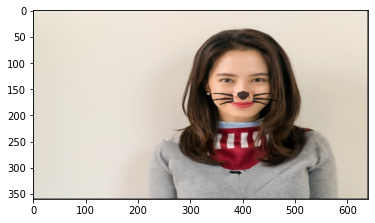

In [498]:
plt.imshow(img_show)
plt.show()

In [ ]:
# 이미지가 변경될 때마다 sticker_area, img_sticker의 사이즈도 같이 변경이 되어야 하는데...